In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Алгоритм синтезирования данных

In [17]:
num_cargo = np.random.randint(low=50, high=150) # max ULD num is 128
weight_cargo = np.random.uniform(low=0, high=1.1e+3, size=128)

In [18]:
df_cargo = pd.DataFrame(data={'weights' : weight_cargo})
df_cargo.head()

,weights
0,94.385810
1,129.318387
2,556.853030
3,148.020991
4,375.299394


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFE7920AC8>]],
      dtype=object)

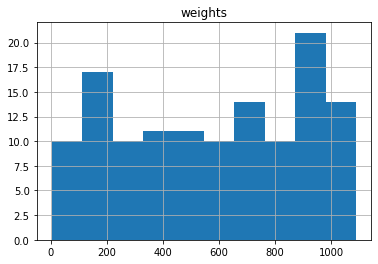

In [19]:
df_cargo.hist()

# Алгоритм предобработки данных

In [20]:
# Экспоненцильное распределение
exp_border = 1e+3 * np.array([15.00140646, 13.23852923, 11.68281499, 10.30991916,  9.09835798, 8.02917236,  7.08563116,  6.25296938])

# Трапециевидное распределение
trap_border = 1e+3 * np.array([15., 20., 20., 20., 20., 20., 20., 15.])

In [21]:
sort_weight_cargo = np.sort(weight_cargo)[::-1]
sort_weight_cargo[:10].sum()

10546.271341698408

## Экспоненциальный подход

In [22]:
# Инициализируем загрузочные группы
wagon_group_1 = np.zeros(10)
wagon_group_2 = np.zeros(18)
wagon_group_3 = np.zeros(18)
wagon_group_4 = np.zeros(18)
wagon_group_5 = np.zeros(18)
wagon_group_6 = np.zeros(18)
wagon_group_7 = np.zeros(18)
wagon_group_8 = np.zeros(10)

# Инициализируем массив загрзочных очередей
wag_group_array = np.array([wagon_group_1,
                            wagon_group_2,
                            wagon_group_3,
                            wagon_group_4,
                            wagon_group_5,
                            wagon_group_6,
                            wagon_group_7,
                            wagon_group_8])

In [23]:
queue = np.sort(weight_cargo)[::-1]

mesh_step = queue.max()//8 # Ша
cargo_dict = { 1 : queue[queue <= 1 * mesh_step],
               2 : queue[queue <= 2 * mesh_step],
               3 : queue[queue <= 3 * mesh_step],
               4 : queue[queue <= 4 * mesh_step],
               5 : queue[queue <= 5 * mesh_step],
               6 : queue[queue <= 6 * mesh_step],
               7 : queue[queue <= 7 * mesh_step],
               8 : queue[queue <= 8 * mesh_step]}
cargo_dict

{1: array([135.68401762, 129.31838714, 100.95397262,  98.18380487,
         94.38581007,  77.01037889,  74.31282058,  70.1400747 ,
         45.37573318,   9.30479238,   5.8218892 ,   4.09662854]),
 2: array([269.97564028, 269.21282209, 264.86241251, 259.67800466,
        253.29008251, 209.60448632, 201.40136164, 191.19343161,
        181.25867923, 178.24847392, 167.53315439, 165.90117236,
        161.85920267, 160.00486732, 155.64077269, 153.88359876,
        148.79870092, 148.02099069, 147.11428624, 147.0978847 ,
        135.68401762, 129.31838714, 100.95397262,  98.18380487,
         94.38581007,  77.01037889,  74.31282058,  70.1400747 ,
         45.37573318,   9.30479238,   5.8218892 ,   4.09662854]),
 3: array([384.97519852, 383.18491332, 379.72086951, 375.29939424,
        374.3537807 , 371.55363127, 369.69906791, 362.10860638,
        304.91992694, 291.52380263, 289.48527292, 289.41138942,
        278.59609307, 269.97564028, 269.21282209, 264.86241251,
        259.67800466, 253.2

In [24]:
queue = np.sort(weight_cargo)[::-1]
border = exp_border

for i,val in enumerate(wag_group_array): # Идем по инициализированному списку очередей
    pos = 0
    max_limit = border[i]/val.size
    for j,el in enumerate(queue): # Идем по очереди грузов
        if el <= max_limit
        
print('que shape: ', queue.size)
for i in wag_group_array:
    print('array: ', i)

SyntaxError: invalid syntax (<ipython-input-24-5dc4e7e41e0b>, line 8)

In [ ]:
queue[queue <= 100.]

## Трапециевидный подход

In [25]:
from itertools import permutations
from itertools import combinations

In [29]:
array = np.round(np.random.uniform(low=100, high=200, size=(2,3)), 2)
permutations(array)

In [31]:
list(combinations(np.array([1,2,3,4]).reshape(2,2), r=2))

[(array([1, 2]), array([3, 4]))]

## Алгоритмы поиска решения 

In [32]:
from itertools import permutations
from itertools import combinations

In [34]:
def replacement(list_, ind_1, ind_2):
    template = list_[ind_1]
    list_[ind_1] = list_[ind_2]
    list_[ind_2] = template
    return list_

def calc_func(scheme):
    scheme = np.array(scheme).reshape(2,-1)
    top_row = np.sum(scheme[0])
    bot_row = np.sum(scheme[1])
    left_cols = np.sum(scheme[:,:4])
    right_cols = np.sum(scheme[:,5:])
    vert_dis = np.abs(top_row - bot_row)
    horiz_dis = np.abs(left_cols - right_cols)
    return (vert_dis, horiz_dis)

def find_scheme(list_scheme):
    len_ls = len(list_scheme) # смотрим длину списка схем
    for i in range(len_ls): # по циклу перебираем каждую
        scheme = list_scheme[i] # записываем схему в переменную
        disbalance = calc_func(scheme) # считаем выбранные метрики
        min_ = None
        if min_ == None: # если min пустой, то инициализируем первой ветрикой и возвращаемое значение приравниваем 
                         # к индексу первой схемы
            min_ = disbalance 
            scheme_ind = i
        elif min_[0] > disbalance[0] and min_[1] > disbalance[1]: # если расчитаные метрики меньше минимума, то обновляем 
                                                                  # минимум
            min_ = disbalance
            scheme_ind = i 
    return i

#def find_solution(scheme):
    #while

In [35]:
find_scheme([np.arange(18), np.ones(18)])

1

In [37]:
# Работающий блок
def replacement(scheme, ind_1, ind_2):
    template = scheme[ind_1]
    scheme[ind_1] = scheme[ind_2]
    scheme[ind_2] = template
    return scheme

def optimal_scheme_tree(scheme):
    shape_scheme = scheme.size
    scheme = scheme.reshape(1,-1)[0]
    min_cm = None
    count = 100
    while count:
        for i in range(shape_scheme):
            for j in range(shape_scheme):
                child = replacement(scheme.copy(), i, j)
                cm_value = center_mass(child.reshape(2,-1))
                if min_cm == None:
                    min_cm = cm_value
                    opt_scheme = child
                    block_ind = j
                elif min_cm > cm_value:
                    min_cm = cm_value
                    opt_scheme = child
                    block_ind = j
            scheme = opt_scheme
        count -= 1
    return scheme.reshape(2,-1)

In [38]:
test = 1e+3 * np.random.random_sample(size=18).reshape(2,-1)
test

array([[503.14462335,  39.7795207 ,  29.2466222 , 854.34280095,
        659.44297415, 839.89589229, 254.69903632,  93.2876527 ,
        867.56447186],
       [ 57.6549864 , 862.78549066, 271.58462431, 476.70451776,
        936.43719785, 184.12533584, 155.22706452, 608.09581438,
        481.39907047]])

In [42]:
opt = optimal_scheme_tree(test)
center_mass(opt)

0.0015959922053201602

In [13]:
np.round(opt)

array([[928., 294., 106., 115., 247., 465., 123., 887., 457.],
       [129., 637., 558.,  57., 722., 610., 374., 500., 115.]])

In [9]:
opt_2 = optimal_scheme_win(test)
center_mass(opt_2)

0.0007025873775029204

In [11]:
np.round(opt_2)

array([[558.,  57., 610., 500., 106., 115., 457., 374., 887.],
       [637., 247., 129., 722., 294., 928., 465., 115., 123.]])

## Смещающееся окно

In [122]:
scheme = np.arange(18).reshape(2,-1)
scheme

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [40]:
# Функция создания перестановок заданного окна
# Аргумент функции: схема загрузочной очереди вагона
def window(scheme_win):
    row, cols = scheme_win.shape[0], scheme_win.shape[1]        # смотрим размер поданого списка
    array = scheme_win.reshape(1,-1)[0]                         # создаем одномерный список для расчета всех перестановок
    permut = np.array(list(permutations(array))).reshape(-1,row,cols) # создаем перестановки окна
    return permut

# Функция анализа списка перемещений
def permut_analyze(permutations, main_scheme, left_curt, right_curt):
    min_cm = None
    for permut in permutations:
        main_scheme[:, left_curt:right_curt+1] = permut
        cm_value = center_mass(main_scheme)
        if min_cm == None:
            min_cm = cm_value
            opt_scheme = main_scheme.copy()
        elif min_cm > cm_value:
            min_cm = cm_value
            opt_scheme = main_scheme.copy()
    return opt_scheme
        
        
def optimal_scheme_win(scheme):    
    shape_scheme = scheme.size
    wagon_type = 'head' if shape_scheme == 10 else 'intermediat'
    if wagon_type == 'intermediat':
        for i in range(3):
            left_curt, right_curt = 3*i, 3*i+2
            select_win = scheme[:,left_curt:right_curt+1]
            permut = window(select_win)
            scheme = permut_analyze(permut, scheme, left_curt, right_curt)
        for i in range(7):
            left_curt, right_curt = i, i+2
            select_win = scheme[:,left_curt:right_curt+1]
            permut = window(select_win)
            scheme = permut_analyze(permut, scheme, left_curt, right_curt)
        for i in range(3):
            left_curt, right_curt = 3*i, 3*i+(3-1)
            select_win = scheme[:,left_curt:right_curt+1]
            permut = window(select_win)
            scheme = permut_analyze(permut, scheme, left_curt, right_curt)
    elif wagon_type == 'head':
        for i in range(2):
            left_curt, right_curt = i, 3*i+2
            select_win = scheme[:,left_curt:right_curt+1]
            permut = window(select_win)
            scheme = permut_analyze(permut, scheme, left_curt, right_curt)
        for i in range(3):
            left_curt, right_curt = i, i+2
            select_win = scheme[:,left_curt:right_curt+1]
            permut = window(select_win)
            scheme = permut_analyze(permut, scheme, left_curt, right_curt)
    return scheme

def center_mass(scheme):
    # Дина вагона 24.2м
    # Ширина 3.36 м

    # Отступ горизонтальный 0.1 м
    # Отступ вертикальный 0.18 м

    # Параметры вагона 

    wagon_length, wagon_width = 24.2, 3.36    
    h_space, v_space = 0.1, 0.18
    
    inside_wagon_length = wagon_length - 2 * h_space
    inside_wagon_width = wagon_width - 2 * v_space
    
    geom_wag_center = (wagon_length / 2, wagon_width / 2, 1.5) # геометрический центр вагона
    
    vag = np.array([0., 0., wagon_length, 0., wagon_length, wagon_width, 0., wagon_width, 0., 0.]).reshape((-1,2)) # Координаты внешних краев вагона
    
    # Расчет координат углов поддонов
    
    pallets_x = np.linspace(vag[0, 0] + h_space, vag[1, 0] - h_space, 10)
    pallets_y = np.linspace(vag[0, 1] + v_space, vag[3, 1] - v_space, 3)
    
    vec_x, vec_y = np.meshgrid(pallets_x, pallets_y)
    
    pallets = np.vstack((vec_x, vec_y)).reshape((2, -1)).T # Координаты паллет
    
    # Расчет координат центров поддонов
    
    lengthBlock = inside_wagon_length/18
    widthBlock = inside_wagon_width/4
    
    x_cen = np.linspace(h_space + lengthBlock, wagon_length - h_space - lengthBlock, 9)
    y_cen = np.linspace(v_space + widthBlock, wagon_width - v_space - widthBlock, 2)
    
    xv_cen, yv_cen = np.meshgrid(x_cen, y_cen)
    zv_cen = 1.5 * np.ones_like(xv_cen)
    
    centers = np.vstack((xv_cen, yv_cen)) # Координаты центров паллет
    centers = np.vstack((centers, zv_cen)).reshape((3,-1)).T
    
    horiz_imbal = np.abs(np.sum(scheme[0, :] - scheme[1, :]))
    vert_imbal = np.abs(np.sum(scheme[:,:4]) - np.sum(scheme[:,5:]))
    
    #print('Продольная разбаллансировка: ', horiz_imbal, '\nПоперечная разбаллансировка: ', vert_imbal)
    
    # Расчет центра масс
    
    mass_center = scheme.reshape((1,-1)).dot(centers)/np.sum(scheme)
    #print('Центр масс: ', mass_center)
    #print('Отклонение центра масс от геометрицеского центра вагона: ', geom_wag_center - mass_center)
    return np.sqrt(np.sum((geom_wag_center - mass_center)**2))

In [43]:
center_mass(opt)

0.0015959922053201602

In [44]:
test_2 = np.random.uniform(low=100, high=200, size=10).reshape(2,-1)
test_2

array([[179.23100651, 199.23929608, 168.85002357, 132.06956136,
        138.49848248],
       [107.2959789 , 116.2529851 , 113.15835592, 154.96844515,
        131.9248718 ]])

In [45]:
opt_2 = optimal_scheme_win(test_2)
center_mass(opt_2)

ValueError: shapes (1,10) and (18,3) not aligned: 10 (dim 1) != 18 (dim 0)

In [199]:
center_mass(opt)

0.8377637578537651

In [200]:
opt_1 = optimal_scheme_win(opt,wi)
center_mass(opt_1)

0.8366156682795172

In [233]:
scheme.size

18

## Перестановка грузов

In [2]:
scheme = np.arange(6).reshape(2,-1)[::-1]
scheme

array([[3, 4, 5],
       [0, 1, 2]])

In [3]:
row, cols = np.where(scheme == 0)[0], np.where(scheme == 0)[1]
null_matrix = np.vstack((row, cols)).reshape(-1,2)
null_matrix

array([[1, 0]], dtype=int64)

In [304]:
def gen_scheme():
    scheme = np.arange(18) + 1
    ind = np.random.randint(low=0, high=18, size=10)
    scheme[ind] = 0
    return scheme.reshape(2,-1)

# DegreeOfFreedom - Функция DOF возвращает количество степеней свободы позиции
# scheme_type принимает значения 'head' или 'intermediat'
# position - объект типа tuple
def DOF(scheme, position):
    col_max = scheme.shape[1]
    train_config = [(0,0), (0,col_max), (1,col_max), (1,0)]
    if position[0] < 0 or position[0] > 1 or position[1] < 0 or position[1] > col_max:
        return print('Incorrect position.')
    if position in train_config:
        return 2
    return 3

# search_shifts - Функция поиска количества свободных ходов
def search_shifts(scheme):
    shape = scheme.shape
    row, cols = np.where(scheme == 0)[0], np.where(scheme == 0)[1]
    pos = np.vstack((row, cols)).T #.reshape(-1,2)
    gl_dict = {}
    #dof = DOF(scheme, pos)
    count = 0
    for i, val in enumerate(pos):
        aval_shifts = []
        if val[0] == 1 and scheme[0, val[1]] != 0:
            aval_shifts.append((0, val[1]))
        elif val[0] == 0 and scheme[1, val[1]] != 0:
            aval_shifts.append((1, val[1]))

        if val[1] == 0 and scheme[val[0], 1] != 0:
            aval_shifts.append((val[0], 1))
        elif val[1] == shape[1]-1 and scheme[val[0], val[1]-1] != 0:
            aval_shifts.append((val[0], val[1]-1))
        elif val[1] > 0 and val[1] < shape[1]-1:
            if scheme[val[0], val[1]-1] != 0:
                aval_shifts.append((val[0], val[1]-1))
            elif scheme[val[0], val[1]+1] != 0:
                aval_shifts.append((val[0], val[1]+1))
        if len(aval_shifts) != 0:
            gl_dict[count] = {'position': val, 'aval shifts' : aval_shifts}
            count += 1
    return gl_dict

In [324]:
schema = gen_scheme()
schema

array([[ 0,  0,  3,  0,  5,  6,  0,  0,  9],
       [10, 11, 12, 13,  0, 15,  0, 17, 18]])

In [325]:
search_shifts(schema)

{0: {'position': array([0, 0], dtype=int64), 'aval shifts': [(1, 0)]},
 1: {'position': array([0, 1], dtype=int64), 'aval shifts': [(1, 1), (0, 2)]},
 2: {'position': array([0, 3], dtype=int64), 'aval shifts': [(1, 3), (0, 2)]},
 3: {'position': array([0, 6], dtype=int64), 'aval shifts': [(0, 5)]},
 4: {'position': array([0, 7], dtype=int64), 'aval shifts': [(1, 7), (0, 8)]},
 5: {'position': array([1, 4], dtype=int64), 'aval shifts': [(0, 4), (1, 3)]},
 6: {'position': array([1, 6], dtype=int64), 'aval shifts': [(1, 5)]}}

In [8]:
DOF(scheme, (1,0))

2

In [33]:
from tqdm import tqdm

In [507]:
class Node():
    def __init__(self, map_, parent, level, aim):
        self.scheme = map_
        if type(parent) == np.ndarray:
            self.parent = parent
        self.children = []
        self.reg=[]
        self.level = level
        self.aim = aim
    
    def swap(self, scheme, pos, shift):
        temp = scheme[pos[0], pos[1]]
        scheme[pos[0], pos[1]] = scheme[shift[0], shift[1]]
        scheme[shift[0], shift[1]] = temp
        return scheme
    
    def add_children(self):
        if self.level == 30:
            print(self.scheme)
            return 4
        list_shifts = search_shifts(self.scheme)
        priot_list = self.get_priority()
        #print('priot_list: ', priot_list)
        for i in range(len(list_shifts)):
            pos = priot_list[i][-1]
            for j in range(len(list_shifts[pos]['aval shifts'])):#list_shifts[i]['aval shifts']:
                shift = list_shifts[pos]['aval shifts'][j]
                swapping = self.swap(self.scheme.copy(), list_shifts[pos]['position'], shift)
                
                if np.all(swapping == aim):
                    self.reg.append(swapping)
                    print(self.reg)
                    return 2
                
                if swapping.tolist() in self.reg:
                    continue
                
                new_child = Node(swapping, self.scheme, self.level+1, self.aim)
                self.reg.append(swapping.tolist())
                self.children.append(new_child)
                flag = new_child.add_children()
                
                if flag == 2:
                    #print('shift', shift)
                    return 2
                #elif flag == 4 and self.level > 10:
                #    return 4
                #elif flag == 4 and self.level == 10:
                #    return 0
        return 1
    
    def get_point(self, point, list_shifts):
        for i in list_shifts:
            if np.all(list_shifts[i]['position'] == point):
                return list_shifts[i]['aval shifts']
    
    def add_children_2(self, point, shifts):
        if self.level == 40:
            return 4
        
        for shift in shifts:
                swapping = self.swap(self.scheme.copy(), point, shift)
                
                if np.all(swapping == aim):
                    self.reg.append(swapping)
                    print(self.reg)
                    return 2
                
                if swapping.tolist() in self.reg:
                    continue
                
                new_child = Node(swapping, self.scheme, self.level+1, self.aim)
                self.reg.append(swapping.tolist())
                self.children.append(new_child)        
                flag = new_child.add_children_2(shift, self.get_point(shift, search_shifts(swapping)))
                
                if flag == 2:
                    #print('shift', shift)
                    return 2
        return 1
           
    def add_children_stochastic(self):
        if self.level == 30:
            return 4
        list_shifts = search_shifts(self.scheme)
        i = np.random.randint(low=0, high=len(list_shifts))
        try:
            pos = np.random.randint(low=0, high=len(list_shifts[i]['aval shifts']))
        except:
            print(list_shifts)
            print(self.scheme)
            print(i)
            print(len(list_shifts[i]['aval shifts']))
        shift = list_shifts[i]['aval shifts'][pos]
        #for i in list_shifts:
            #for shift in list_shifts[i]['aval shifts']:
        swapping = self.swap(self.scheme.copy(), list_shifts[i]['position'], shift)
                
        if np.all(swapping == aim):
            self.reg.append(swapping)
            print(self.reg)
            return 2
                
        new_child = Node(swapping, self.scheme, self.level+1, self.aim)
        self.reg.append(swapping.tolist())
        self.children.append(new_child)
        flag = new_child.add_children_stochastic()
                
        if flag == 2:
            #print('shift', shift)
            return 2
        return 1
    
    # Метод возвращает опзицию нулей
    def get_nulls():
        dict_ = search_shifts(schema)
        nulls = []
        for el in dict_:
            nulls.append(dict_[el]['position'])
        return nulls
    
    def get_priority(self):
        dct ={}
        list_shifts_ = search_shifts(self.scheme.copy())
        for i in list_shifts_:
            lst = {}
            for ind, shift in enumerate(list_shifts_[i]['aval shifts']):
                swapping = self.swap(self.scheme.copy(), list_shifts_[i]['position'], shift)
                lst[ind] = self.get_greed(self.scheme.copy(), swapping)
            dct[i] = lst
        
        lst_dict = list(dct.items())
        result_lst = []
        for i in lst_dict:
            local_dict = list(i[1].items())
            local_dict.sort(key=lambda j: j[1])
            local_dict.append(i[0])
            result_lst.append(local_dict)
        result_lst.sort(key=lambda j: np.sum(j[1]))
        return result_lst
    
    def get_greed(self, schema, swapping):
        greed_1 = np.abs(schema % 9 - swapping % 9)
        greed_2 = np.abs(schema / 9 - swapping / 9)
        return np.sqrt(np.sum((greed_1 + greed_2)**2))
    
    def find_solution(self):
        nulls_shifts = search_shifts(self.scheme)
        for i in nulls_shifts:
            val = self.add_children(nulls_shifts[i]['position'],
                                    nulls_shifts[i]['aval shifts'])
        return val

In [ ]:
class 

In [178]:
dict_ = search_shifts(schema)
nulls = []
for el in dict_:
    nulls.append(dict_[el]['position'])
nulls

[array([0, 6], dtype=int64),
 array([0, 7], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 5], dtype=int64),
 array([1, 6], dtype=int64),
 array([1, 7], dtype=int64),
 array([1, 8], dtype=int64)]

In [508]:
start = np.array([[ 4,  5,  0,  0,  2,  0,  0,  1,  0],
                [0,  0, 0, 0, 0,  3, 0, 0,  0]])
aim = np.array([[ 5,  0,  0,  0,  0,  0,  3,  0,  0],
                [0,  4, 2, 0, 0,  1, 0, 0,  0]])
root = Node(start, 0, 0, aim)

In [494]:
start = np.array([[ 6,  0,  0,  10,  2,  3,  8,  9,  7],
                [0,  0, 0, 4, 0,  0, 0, 5,  1]])
aim = np.array([[ 10,  5,  2,  0,  0,  8,  0,  0,  9],
                [4,  3, 6, 0, 0,  0, 7, 0,  1]])
root = Node(start, 0, 0, aim)

In [503]:
start = np.array([[ 6,  1,  0, 4],
                [3, 0,  2, 0]])
aim = np.array([[ 0,  2,  0, 3],
                [0,  4, 1, 6]])
root = Node(start, 0, 0, aim)

In [509]:
root.add_children()

[[0 4 5 0 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 0 1 0 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 3 0 1 0]
 [0 0 0 0 0 0 0 0 0]]
[[4 0 5 0 0 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[4 0 5 0 0 0 0 1 0]
 [0 0 0 0 2 3 0 0 0]]
[[4 0 5 0 2 0 0 1 0]
 [0 0 0 0 3 0 0 0 0]]
[[4 0 0 0 2 0 0 1 0]
 [0 0 5 0 0 3 0 0 0]]
[[4 0 5 0 2 0 0 1 0]
 [0 0 0 0 0 0 3 0 0]]
[[4 0 5 0 2 0 0 0 0]
 [0 0 0 0 0 3 0 1 0]]
[[4 0 0 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 4 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 4 0 5 2 0 1 0 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 4 0 5 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[0 4 0 5 2 3 0 1 0]
 [0 0 0 0 0 0 0 0 0]]
[[0 4 0 5 0 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 0 0 1 0]
 [0 4 0 0 0 3 0 0 0]]
[[0 4 0 5 0 0 0 1 0]
 [0 0 0 0 2 3 0 0 0]]
[[0 4 0 5 2 0 0 1 0]
 [0 0 0 0 3 0 0 0 0]]
[[0 4 0 0 2 0 0 1 0]
 [0 0 0 5 0 3 0 0 0]]
[[0 4 0 5 2 0 0 1 0]
 [0 0 0 0 0 0 3 0 0]]
[[0 4 0 5 2

 [0 0 0 0 2 0 0 0 0]]
[[4 0 0 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 5 2 3 0 0 0]
 [0 0 0 0 0 0 0 1 0]]
[[0 4 0 5 0 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 0 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 0 5 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 5 0 0 2 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 5 0 2 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 0 5 0 2 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[4 0 0 0 0 2 0 1 0]
 [0 0 0 5 0 3 0 0 0]]
[[4 0 0 5 0 2 0 1 0]
 [0 0 0 0 3 0 0 0 0]]
[[4 0 0 5 0 2 0 1 0]
 [0 0 0 0 0 0 3 0 0]]
[[4 0 0 5 0 2 0 0 0]
 [0 0 0 0 0 3 0 1 0]]
[[4 0 0 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 0 1 0 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 0 0 0 1]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 3 0 1 0]
 [4 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 2 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 0 0 1 0]
 [0 4 0 0 0 3 0 0 0]]
[[0 0 0 5 0 0 0 1 0]
 [4 0 0 0 2 3 0 0 0]]
[[0 0 0 5 2 0 0 1 0]
 [4 0 0 0 3 0 0 0 0]]
[[0 0 0 0 2 0 0 1 0]
 [4 0 0 5 0 3 0 0 0]]
[[0 0 0 5 2 0 0 1 0]
 [4 0 0 0 0

 [0 0 0 0 0 0 3 0 0]]
[[4 0 5 0 2 0 0 1 0]
 [0 0 0 0 0 0 3 0 0]]
[[0 0 5 0 2 0 1 0 0]
 [4 0 0 0 0 0 3 0 0]]
[[4 0 0 0 2 0 1 0 0]
 [0 0 5 0 0 0 3 0 0]]
[[4 0 5 0 0 0 1 0 0]
 [0 0 0 0 2 0 3 0 0]]
[[4 0 5 0 2 0 1 0 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 0 1 0 0]
 [0 0 0 0 0 0 0 3 0]]
[[4 0 5 0 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[0 4 0 5 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[0 4 5 0 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 0 1]
 [0 4 0 0 0 3 0 0 0]]
[[0 4 5 0 2 3 0 0 1]
 [0 0 0 0 0 0 0 0 0]]
[[0 4 5 0 0 2 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[0 4 0 0 2 0 0 0 1]
 [0 0 5 0 0 3 0 0 0]]
[[0 4 5 0 0 0 0 0 1]
 [0 0 0 0 2 3 0 0 0]]
[[0 4 5 0 2 0 0 0 1]
 [0 0 0 0 3 0 0 0 0]]
[[0 4 5 0 2 0 0 0 1]
 [0 0 0 0 0 0 3 0 0]]
[[0 4 5 0 2 0 0 0 0]
 [0 0 0 0 0 3 0 0 1]]
[[0 4 0 5 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 0 0 0 1]
 [4 0 0 0 0 3 0 0 0]]
[[4 0 0 5 2 3 0 0 1]
 [0 0 0 0 0 0 0 0 0]]
[[4 0 0 5 0 2 0 0 1]
 [0 0 0 0 0

 [0 0 0 0 2 0 0 0 0]]
[[4 0 0 0 0 3 0 1 0]
 [0 0 5 0 2 0 0 0 0]]
[[4 0 5 0 0 3 0 1 0]
 [0 0 0 2 0 0 0 0 0]]
[[4 0 5 0 0 3 0 0 0]
 [0 0 0 0 2 0 0 1 0]]
[[0 4 5 0 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 0 5 2 0 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 0 1 0 0]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[4 0 5 0 2 3 0 1 0]
 [0 0 0 0 0 0 0 0 0]]
[[4 0 5 0 0 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[4 0 5 0 0 0 0 1 0]
 [0 0 0 0 2 3 0 0 0]]
[[4 0 5 0 2 0 0 1 0]
 [0 0 0 0 3 0 0 0 0]]
[[4 0 0 0 2 0 0 1 0]
 [0 0 5 0 0 3 0 0 0]]
[[4 0 5 0 2 0 0 1 0]
 [0 0 0 0 0 0 3 0 0]]
[[4 0 5 0 2 0 0 0 0]
 [0 0 0 0 0 3 0 1 0]]
[[0 4 5 0 2 3 0 0 0]
 [0 0 0 0 0 0 0 1 0]]
[[4 0 0 5 2 3 0 0 0]
 [0 0 0 0 0 0 0 1 0]]
[[4 0 5 0 2 0 3 0 0]
 [0 0 0 0 0 0 0 1 0]]
[[4 0 5 0 2 3 0 1 0]
 [0 0 0 0 0 0 0 0 0]]
[[0 0 5 0 2 3 0 0 0]
 [4 0 0 0 0 0 0 1 0]]
[[4 0 0 0 2 3 0 0 0]
 [0 0 5 0 0 0 0 1 0]]
[[4 0 5 0 0 3 0 0 0]
 [0 0 0 0 2 0 0 1 0]]
[[4 0 5 0 2 0 0 0 0]
 [0 0 0 0 0

 [4 0 5 0 0 0 0 0 0]]
[[0 0 5 0 0 3 0 1 0]
 [4 0 0 0 2 0 0 0 0]]
[[0 0 5 0 2 0 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 3 0 0 0]
 [4 0 0 0 0 0 0 1 0]]
[[4 0 5 0 0 2 0 1 0]
 [0 0 0 0 0 3 0 0 0]]
[[0 5 0 0 0 2 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 0 5 0 2 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 0 0 2 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 0 2 0 0 1]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 0 2 0 1 0]
 [0 4 0 0 0 3 0 0 0]]
[[0 0 0 0 0 2 0 1 0]
 [4 0 5 0 0 3 0 0 0]]
[[0 0 5 0 0 2 0 1 0]
 [4 0 0 0 3 0 0 0 0]]
[[0 0 5 0 0 2 0 1 0]
 [4 0 0 0 0 0 3 0 0]]
[[0 0 5 0 0 2 0 0 0]
 [4 0 0 0 0 3 0 1 0]]
[[4 0 5 0 2 0 0 0 1]
 [0 0 0 0 0 3 0 0 0]]
[[0 5 0 0 2 0 0 0 1]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 0 5 2 0 0 0 1]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 1 0]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 3 0 0 1]
 [4 0 0 0 0 0 0 0 0]]
[[0 0 5 0 0 2 0 0 1]
 [4 0 0 0 0 3 0 0 0]]
[[0 0 5 0 2 0 0 0 1]
 [0 4 0 0 0 3 0 0 0]]
[[0 0 5 0 0 0 0 0 1]
 [4 0 0 0 2 3 0 0 0]]
[[0 0 5 0 2 0 0 0 1]
 [4 0 0 0 3

KeyboardInterrupt: 

In [306]:
search_shifts(start)

{0: {'position': array([0, 2], dtype=int64), 'aval shifts': [(1, 2), (0, 1)]},
 1: {'position': array([1, 1], dtype=int64), 'aval shifts': [(0, 1), (1, 0)]},
 2: {'position': array([1, 3], dtype=int64), 'aval shifts': [(0, 3), (1, 2)]}}

In [330]:
u = 100000
while u > 0:
    val = root.add_children_stochastic()
    if val != 1:
        print(val)
    u -= 1

KeyboardInterrupt: 

In [ ]:
root.add_children_2([1, 3], [(0, 3), (1, 2)])

In [321]:
register = []
shift_ = []
root.add_children()

1

In [ ]:
print(root.children[0].scheme)
print(root.children[1].scheme)

In [326]:
search_shifts(schema)

(array([0, 0, 0, 0, 1, 1, 1], dtype=int64), array([1, 4, 5, 7, 0, 1, 7], dtype=int64))
[0 0]


{'position': array([0, 0], dtype=int64), 'aval shifts': [(1, 0), (0, 1)]}

In [253]:
np.all(np.array([[1,2],[3,4]]) == np.array([[1,2],[3,4]]))

True

In [135]:
search_shifts(np.array([[1,2,0],[3,4,5]]))

{'position': array([0, 2], dtype=int64), 'aval shifts': [(1, 2), (0, 1)]}

In [167]:
sch[1,2]

5

In [321]:
np.where(schema == 0)[0]

array([0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [459]:
def gen_schem_un():
    n = np.random.randint(low=1, high=18)
    row = np.random.randint(low=0, high=2, size=n)#.reshape(-1,1)
    col = np.random.randint(low=0, high=9, size=n)#.reshape(-1,1)
    schema = np.array(['O' for i in range(18)]).reshape(2,-1)
    schema[row, col] = 'X'
    return schema
    
    
# Алгоритм поиска группировки грузов
def find_area(scheme_un):
    shape = scheme_un.shape
    center = shape[1]//2
    
    null_count = (scheme_un == 'X').sum()
    
    # Левая область
    left_area_un = scheme_un[:,center+1:]
    left_l_a_u = (left_area_un == 'X').sum()
    high_l_a_u = (left_area_un[0] == 'X').sum()
    low_l_a_u = (left_area_un[1] == 'X').sum()
    
    # Правая область 
    right_area_un = scheme_un[:,:center]
    right_r_a_u = (right_area_un == 'X').sum()
    high_r_a_u = (right_area_un[0] == 'X').sum()
    low_r_a_u = (right_area_un[1] == 'X').sum()
    
    # Центр
    mid_line_un = (scheme_un[:,center] == 'X').sum()
    
    # Если центр пустой
    if mid_line_un == 0:
        # Если справа больше, то
        if right_r_a_u > left_l_a_u:
            unload_scheme = unloading_distribution(high_r_a_u, low_r_a_u, high_l_a_u, left_l_a_u, center, 0, 1)
        else:
            unload_scheme = unloading_distribution(high_r_a_u, low_r_a_u, high_l_a_u, left_l_a_u, center, 1, 0)
    else:
        if mid_line_un == 2:
            unload_scheme = unloading_distribution(high_r_a_u, low_r_a_u, high_l_a_u, left_l_a_u, center, 1, 1)
        # Сверху в центре есть груз
        elif mid_line_un == 1 and scheme_un[0,center] == 'X': 
            unload_scheme = unloading_distribution(high_r_a_u, low_r_a_u, high_l_a_u, left_l_a_u, center, 1, 1, mode='Top')
        # Снизу в центре есть груз
        elif mid_line_un == 1 and scheme_un[1,center] == 'X': 
            unload_scheme = unloading_distribution(high_r_a_u, low_r_a_u, high_l_a_u, left_l_a_u, center, 1, 1, mode='Bot')
    return unload_scheme

# Функция распределения грузов вокруг точки выгрузки
def unloading_distribution(hrau, lrau, hlau, llau, center, r_shift, l_shift, mode='None'):
    if mode == 'None' : 
        rt_shift, rb_shift = r_shift, r_shift
        lt_shift, lb_shift = l_shift, l_shift
    
    elif mode == 'Top':
        rt_shift, rb_shift = r_shift, r_shift
        lt_shift, lb_shift = l_shift, l_shift - 1
    
    elif mode == 'Bot':
        rt_shift, rb_shift = r_shift, r_shift
        lt_shift, lb_shift = l_shift - 1, l_shift
        
    unload_scheme = np.array(['O' for i in range(18)]).reshape(2,-1)
    for i in range(rt_shift, hrau):
        unload_scheme[1,center+i] = 'X'
    for i in range(rb_shift, lrau):
        unload_scheme[0,center+i] = 'X'
    for i in range(lt_shift, hlau):
        unload_scheme[1,center-i] = 'X'
    for i in range(lb_shift, llau):
        unload_scheme[0,center-i] = 'X'
    return unload_scheme

In [460]:
test_schema.shape

(2, 9)

In [461]:
test_schema = gen_schem_un()
test_schema

array([['O', 'X', 'X', 'X', 'X', 'O', 'X', 'O', 'O'],
       ['X', 'O', 'O', 'O', 'O', 'O', 'X', 'O', 'X']], dtype='<U1')

In [462]:
find_area(test_schema)

array([['O', 'O', 'X', 'X', 'X', 'O', 'O', 'O', 'O'],
       ['O', 'O', 'O', 'O', 'O', 'X', 'X', 'O', 'O']], dtype='<U1')

In [426]:
test_schema[:,4:]

array([['O', 'O', 'O', 'O', 'O'],
       ['O', 'O', 'O', 'O', 'O']], dtype='<U1')

In [371]:
find_area(1, np.arange(10).reshape((2,-1)))

(1, 3)

In [383]:
ind = np.arange(4).reshape(2,2)
ind

array([[0, 1],
       [2, 3]])

In [385]:
schema[ind[0,:], ind[1,:]]

array([ 3, 13])

In [386]:
schema

array([[ 1,  0,  3,  4,  0,  0,  7,  0,  9],
       [ 0,  0, 12, 13, 14, 15, 16,  0, 18]])

In [387]:
ind[0,:]

array([0, 1])

In [392]:
(np.array([['X', 'O', 'O', 'O', 'O', 'X', 'O', 'O', 'O'],
       ['O', 'O', 'O', 'O', 'X', 'O', 'O', 'O', 'O']], dtype='<U1')[0] == 'X').sum()

2